In [6]:
import matplotlib.pyplot as plt
import numpy as np
import requests
import time
from dotenv import load_dotenv
import os
import pandas as pd

load_dotenv()
api_key = os.getenv('RIOT_TOKEN')

In [2]:
#only set to work for NA1
def get_puuid_by_summoner_name(summoner_name):

    api_url = f"https://na1.api.riotgames.com/tft/summoner/v1/summoners/by-name/{format_for_url(summoner_name)}?api_key={api_key}"

    #debug
    # print(api_url)

    #rate limit check
    while True:
        resp = requests.get(api_url)
        status_code = resp.status_code
        print("Status Code:", status_code)
        # whenever we see a 429, we sleep for 30 seconds and then restart from the top of the "while" loop
        if status_code == 429:
            print("Rate Limit hit, sleeping for 30 seconds")
            time.sleep(30)
            # continue means start the loop again
            continue
        player_info = resp.json()
        return player_info

#summoner name to be changed for the url
def format_for_url(summoner_name):
    formatted_summ_name = summoner_name.replace(" ", '%20')
    return formatted_summ_name

def get_matches_by_puuid(puuid):
    api_url = f"https://americas.api.riotgames.com/tft/match/v1/matches/by-puuid/{puuid}/ids?start=0&count=30&api_key={api_key}"

    #debug
    print(api_url)

    #rate limit check
    while True:
        resp = requests.get(api_url)
        status_code = resp.status_code
        print("Status Code:", status_code)
        # whenever we see a 429, we sleep for 30 seconds and then restart from the top of the "while" loop
        if status_code == 429:
            print("Rate Limit hit, sleeping for 30 seconds")
            time.sleep(30)
            # continue means start the loop again
            continue
        player_info = resp.json()
        return player_info

def get_match_by_match_id(match_id):
    api_url = f"https://americas.api.riotgames.com/tft/match/v1/matches/{match_id}?api_key={api_key}"

    #debug
    print(api_url)

    #rate limit check
    while True:
        resp = requests.get(api_url)
        status_code = resp.status_code
        print("Status Code:", status_code)
        # whenever we see a 429, we sleep for 30 seconds and then restart from the top of the "while" loop
        if status_code == 429:
            print("Rate Limit hit, sleeping for 30 seconds")
            time.sleep(30)
            # continue means start the loop again
            continue
        player_info = resp.json()
        return player_info



In [17]:
player_dict = get_puuid_by_summoner_name("500LBWard")
puuid = player_dict.get('puuid')

matches_list = get_matches_by_puuid(puuid)

placement = {}
for match_ids in matches_list:
    match_stats_dict = get_match_by_match_id(match_ids)
    match_stats_info_dict = match_stats_dict['info']
    match_info_participants_list = match_stats_info_dict['participants']

    for i in match_info_participants_list:
        if i['puuid'] == puuid:
            if (i['placement'] in placement):
                placement[i['placement']] += 1
            else:
                placement[i['placement']] = 1

# for i in matches_list:
#     single_match = i

# single_match_dict = get_match_by_match_id()

print(placement)


# match_stats_df = pd.DataFrame(match_stats)
# match_stats_df

Status Code: 200
https://americas.api.riotgames.com/tft/match/v1/matches/by-puuid/IBRIdFqM_6tXE-W296YY-R7sv9Jh1eU2HBThEHWauhYEkiCpZZCwxwiKbnRRI2XNYfDVBzNNSFyPuQ/ids?start=0&count=30&api_key=RGAPI-6d0194e3-ad61-45b3-88a3-5b37816c7cce
Status Code: 200
https://americas.api.riotgames.com/tft/match/v1/matches/NA1_4485624830?api_key=RGAPI-6d0194e3-ad61-45b3-88a3-5b37816c7cce
Status Code: 200
https://americas.api.riotgames.com/tft/match/v1/matches/NA1_4485544868?api_key=RGAPI-6d0194e3-ad61-45b3-88a3-5b37816c7cce
Status Code: 200
https://americas.api.riotgames.com/tft/match/v1/matches/NA1_4481288376?api_key=RGAPI-6d0194e3-ad61-45b3-88a3-5b37816c7cce
Status Code: 200
https://americas.api.riotgames.com/tft/match/v1/matches/NA1_4481261330?api_key=RGAPI-6d0194e3-ad61-45b3-88a3-5b37816c7cce
Status Code: 200
https://americas.api.riotgames.com/tft/match/v1/matches/NA1_4471778419?api_key=RGAPI-6d0194e3-ad61-45b3-88a3-5b37816c7cce
Status Code: 200
https://americas.api.riotgames.com/tft/match/v1/matches

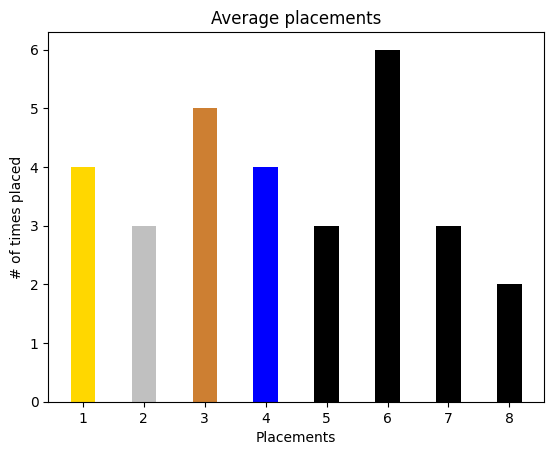

In [30]:
# print(placement.values())
placement_lists = sorted(placement.items())

x, y = zip(*placement_lists)

fig = plt.figure()

placement_colors = ['#FFD700', '#C0C0C0', '#CD7F32', 'blue', '#000000', '#000000', '#000000', '#000000']
plt.bar(x, y, color = placement_colors, width = 0.4)
plt.xlabel('Placements')
plt.ylabel('# of times placed')
plt.title('Average placements')

fig.savefig('temp.png', transparent = True)
plt.show()